In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/siniestros-bdd.csv', encoding='utf-8', sep=';')
data.columns

Index(['MES', 'DIA', 'HORA', 'PROVINCIA', 'CANTON', 'ZONA', 'NUM_FALLECIDO',
       'NUM_LESIONADO', 'TOTAL_VICTIMAS', 'CLASE', 'CAUSA'],
      dtype='object')

In [3]:
data.shape

(24595, 11)

### Exploración de datos 

In [4]:
data.head()

,MES,DIA,HORA,PROVINCIA,CANTON,ZONA,NUM_FALLECIDO,NUM_LESIONADO,TOTAL_VICTIMAS,CLASE,CAUSA
0,1,2,11,10,1004,1,0,0,0,7,4
1,1,2,23,10,1001,2,0,0,0,8,10
2,1,2,12,18,1801,1,0,3,3,3,7
3,1,2,7,18,1801,2,0,1,1,1,1
4,1,2,4,17,1701,1,0,0,0,4,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24595 entries, 0 to 24594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   MES             24595 non-null  int64
 1   DIA             24595 non-null  int64
 2   HORA            24595 non-null  int64
 3   PROVINCIA       24595 non-null  int64
 4   CANTON          24595 non-null  int64
 5   ZONA            24595 non-null  int64
 6   NUM_FALLECIDO   24595 non-null  int64
 7   NUM_LESIONADO   24595 non-null  int64
 8   TOTAL_VICTIMAS  24595 non-null  int64
 9   CLASE           24595 non-null  int64
 10  CAUSA           24595 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [6]:
data.isnull().sum()

MES               0
DIA               0
HORA              0
PROVINCIA         0
CANTON            0
ZONA              0
NUM_FALLECIDO     0
NUM_LESIONADO     0
TOTAL_VICTIMAS    0
CLASE             0
CAUSA             0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(818)

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(23777, 11)

In [9]:
for col in data.columns:
    print(f"{col}: {data[col].value_counts().count()}")

MES: 12
DIA: 7
HORA: 24
PROVINCIA: 24
CANTON: 172
ZONA: 2
NUM_FALLECIDO: 8
NUM_LESIONADO: 22
TOTAL_VICTIMAS: 23
CLASE: 8
CAUSA: 10


In [10]:
data = data.drop(columns=['CANTON', 'MES', 'TOTAL_VICTIMAS'])

In [11]:
categories = ['DIA', 'HORA', 'PROVINCIA', 'ZONA', 'CLASE', 'CAUSA']
for cat in categories:
    data[cat] = data[cat].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23777 entries, 0 to 24594
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   DIA            23777 non-null  category
 1   HORA           23777 non-null  category
 2   PROVINCIA      23777 non-null  category
 3   ZONA           23777 non-null  category
 4   NUM_FALLECIDO  23777 non-null  int64   
 5   NUM_LESIONADO  23777 non-null  int64   
 6   CLASE          23777 non-null  category
 7   CAUSA          23777 non-null  category
dtypes: category(6), int64(2)
memory usage: 699.2 KB


In [12]:
clase_siniestro_dict = {
    1: 'Atropellos',
    2: 'Caída de pasajero',
    3: 'Choques',
    4: 'Estrellamientos',
    5: 'Rozamientos',
    6: 'Volcamientos',
    7: 'Pérdida de pista',
    8: 'Otros'
}

clase_siniestro_mapped = data['CLASE'].map(clase_siniestro_dict )
clase_siniestro_mapped.value_counts()

CLASE
Choques              10981
Atropellos            3811
Estrellamientos       3100
Pérdida de pista      2997
Rozamientos           1220
Caída de pasajero      696
Otros                  558
Volcamientos           414
Name: count, dtype: int64

In [13]:
causa_siniestro_dict = {1:"EMBRIAGUEZ O DROGA",
2:"MAL REBASAMIENTO INVADIR CARRIL",
3:"EXCESO VELOCIDAD",
4:"IMPERICIA E IMPRUDENCIA DEL CONDUCTOR",
5:"IMPRUDENCIA  DEL PEATÓN",
6:"DAÑOS MECÁNICOS",
7:"NO RESPETA LAS SEÑALES DE TRÁNSITO",
8:"FACTORES CLIMÁTICOS",
9:"MAL ESTADO DE LA VÍA",
10:"OTRAS CAUSAS"}

causa_siniestro_mapped = data['CAUSA'].map(causa_siniestro_dict)
causa_siniestro_mapped.value_counts()

CAUSA
IMPERICIA E IMPRUDENCIA DEL CONDUCTOR    11575
EXCESO VELOCIDAD                          3680
NO RESPETA LAS SEÑALES DE TRÁNSITO        2979
EMBRIAGUEZ O DROGA                        1776
MAL REBASAMIENTO INVADIR CARRIL           1724
IMPRUDENCIA  DEL PEATÓN                   1229
FACTORES CLIMÁTICOS                        230
MAL ESTADO DE LA VÍA                       220
OTRAS CAUSAS                               194
DAÑOS MECÁNICOS                            170
Name: count, dtype: int64

In [14]:
data_labels = data.assign(CLASE_LABEL=clase_siniestro_mapped, CAUSA_LABEL=causa_siniestro_mapped)
data_labels.head()

,DIA,HORA,PROVINCIA,ZONA,NUM_FALLECIDO,NUM_LESIONADO,CLASE,CAUSA,CLASE_LABEL,CAUSA_LABEL
0,2,11,10,1,0,0,7,4,Pérdida de pista,IMPERICIA E IMPRUDENCIA DEL CONDUCTOR
1,2,23,10,2,0,0,8,10,Otros,OTRAS CAUSAS
2,2,12,18,1,0,3,3,7,Choques,NO RESPETA LAS SEÑALES DE TRÁNSITO
3,2,7,18,2,0,1,1,1,Atropellos,EMBRIAGUEZ O DROGA
4,2,4,17,1,0,0,4,3,Estrellamientos,EXCESO VELOCIDAD


Text(0.5, 1.0, 'Causa de siniestro')

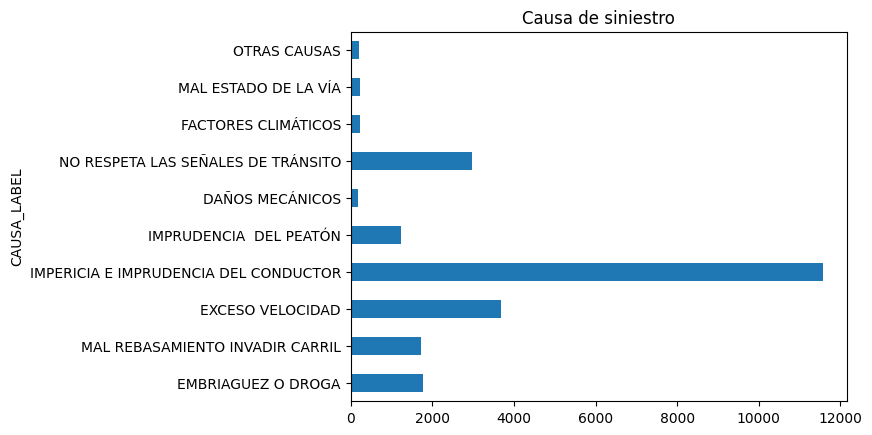

In [15]:
data_labels["CAUSA_LABEL"].value_counts().sort_index().plot(kind='barh')

plt.title('Causa de siniestro')

Text(0.5, 1.0, 'Siniestros por día')

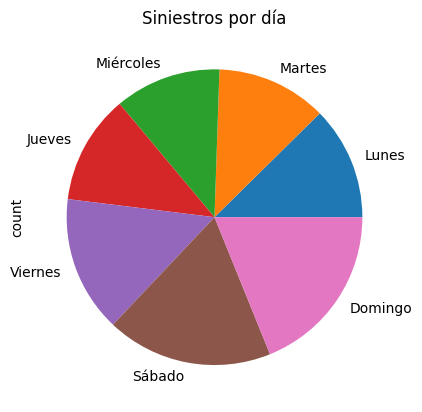

In [16]:
data_labels['DIA'].value_counts().sort_index().plot(kind='pie', labels = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])

plt.title('Siniestros por día')



/var/folders/jz/gsylw_696f13znfz5rbvtswc0000gn/T/ipykernel_3002/273372520.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_zona = data_labels.groupby(['CLASE_LABEL', 'ZONA']).size().unstack()


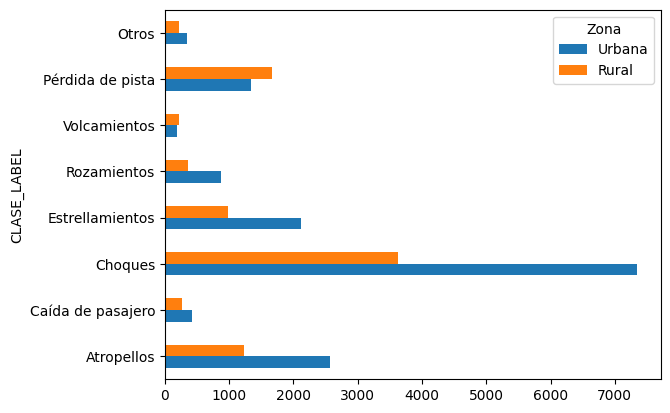

In [17]:
clase_zona = data_labels.groupby(['CLASE_LABEL', 'ZONA']).size().unstack()

clase_zona.plot(kind='barh')
plt.legend(title='Zona', labels = ["Urbana", "Rural"])


#### TRASNFORMACIÓN

In [57]:
transform_data = pd.get_dummies(data, columns= categories, prefix=cat, drop_first=True, dtype=int)
transform_data.head()

,NUM_FALLECIDO,NUM_LESIONADO,DIA_2,DIA_3,DIA_4,DIA_5,DIA_6,DIA_7,DIA_1,DIA_2,...,DIA_8,DIA_2,DIA_3,DIA_4,DIA_5,DIA_6,DIA_7,DIA_8,DIA_9,DIA_10
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15, random_state=42)
pca.fit(transform_data)
data_reduced = pca.transform(transform_data)

In [181]:
import seaborn as sns
data_reduced = pd.DataFrame(data_reduced, columns=[f'PC{i}' for i in range(1, 16)])
#sns.pairplot(data_reduced)

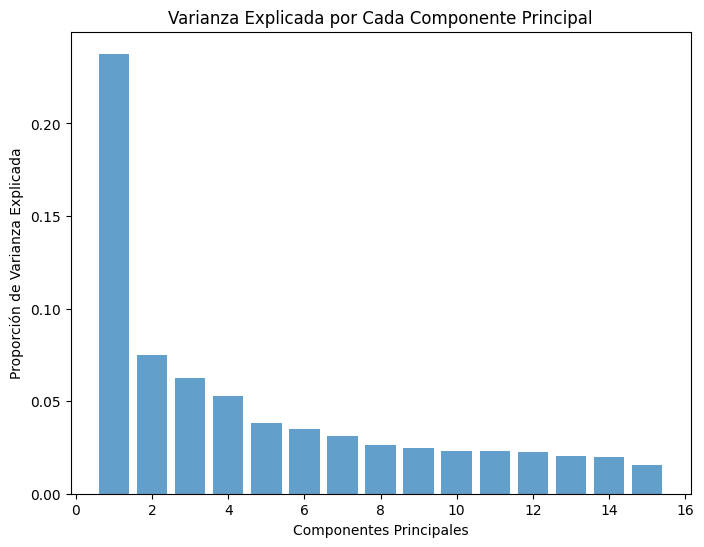

In [182]:
explained_variance = pca.explained_variance_ratio_

# Gráfico de la varianza explicada por cada componente
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

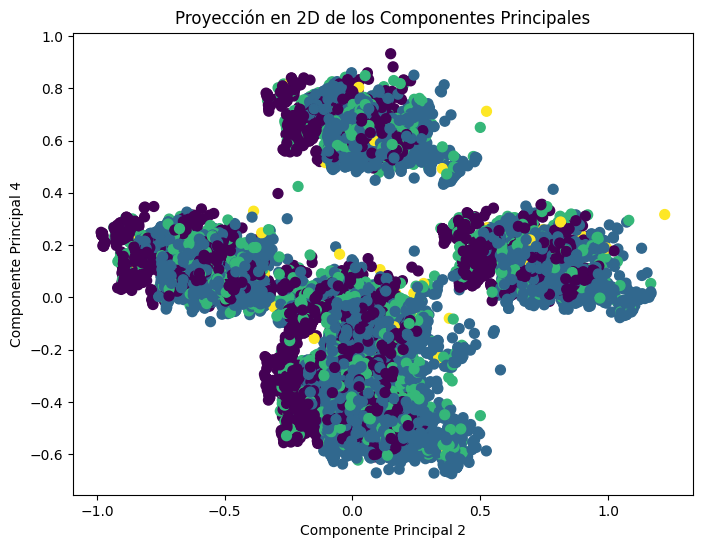

In [187]:
from sklearn.cluster import KMeans
# Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=56)
kmeans.fit(data_reduced)

# Obtener las etiquetas de cluster
labels = kmeans.labels_

# Visualización en 2D con las primeras dos componentes
plt.figure(figsize=(8,6))
plt.scatter(data_reduced['PC6'], data_reduced['PC8'], c=labels, cmap='viridis', s=50)
plt.xlabel('Componente Principal 2')
plt.ylabel('Componente Principal 4')
plt.title('Proyección en 2D de los Componentes Principales')
plt.show()

Despues de haber analizado y transformado los datos en 4 componentes para visualizar cual sería una aproximación del número de clusters s epuede concluir que se pueden obtener de 4-5 clusters. El dataset final se denomina **siniestros-bdd-transform**.


In [196]:
data_reduced.to_csv('data/siniestros-bdd-transform.csv', index=False)